In [1]:
#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
#memanggil dataset
df = pd.read_csv('PAANEN4.csv')
#deskripsi dataset
df.head()

,tahun,bulan,tanggal,arus,salinitas,suhu,modal,total_produksi
0,2011,8,10,NaN,33,30,182520,1950
1,2011,8,11,NaN,33,29,89107,952
2,2011,8,14,NaN,33,30,145735,1557
3,2011,8,14,NaN,33,30,114660,1225
4,2011,8,14,NaN,33,30,915408,978


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tahun           702 non-null    int64  
 1   bulan           702 non-null    int64  
 2   tanggal         702 non-null    int64  
 3   arus            684 non-null    float64
 4   salinitas       702 non-null    int64  
 5   suhu            702 non-null    int64  
 6   modal           702 non-null    int64  
 7   total_produksi  702 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 44.0 KB


<Axes: >

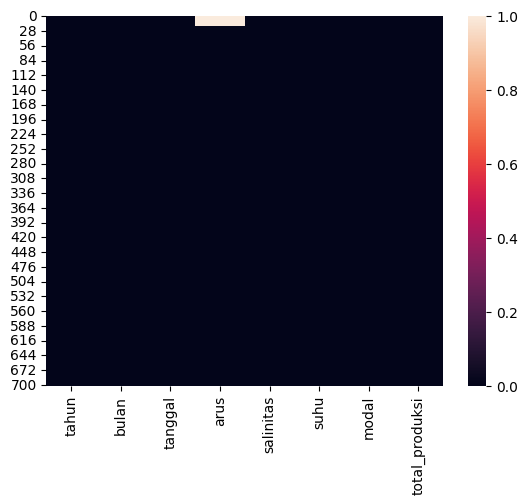

In [4]:
#melihat missing data
sns.heatmap(df.isnull())

In [5]:
#mengisi data yang kosong pada kolom arus
rata_arus = df['arus'].mean()

In [6]:
df['arus'] = df['arus'].fillna(rata_arus)
df['arus'].isna().sum()

0

In [7]:
#df = df.drop(['tanggal'], axis=1)

<Axes: >

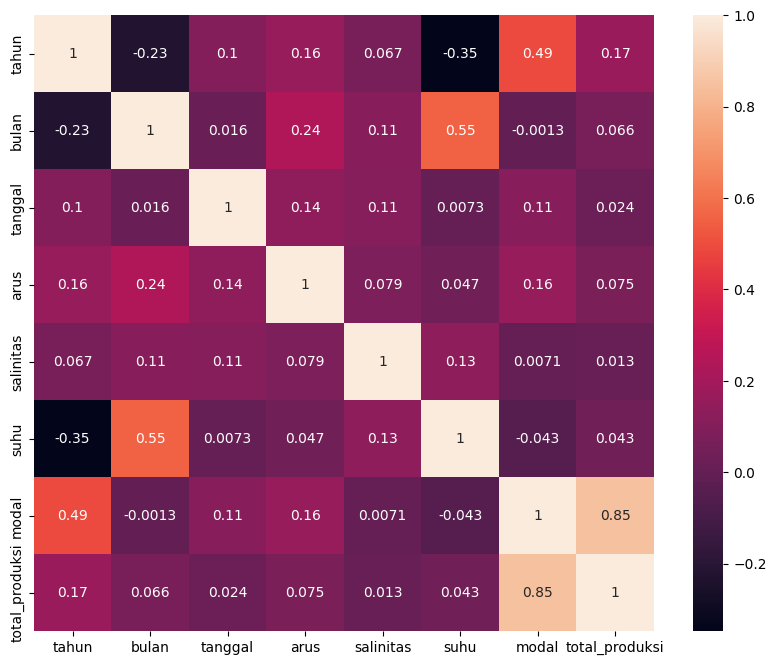

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [9]:
df.describe()

,tahun,bulan,tanggal,arus,salinitas,suhu,modal,total_produksi
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,7.020000e+02,702.000000
mean,2015.028490,6.183761,14.967236,0.229444,33.041311,29.418803,1.826269e+05,1146.246439
std,2.473088,3.664865,8.106306,0.159170,0.199149,1.379942,3.310794e+05,2439.024068
min,2011.000000,1.000000,1.000000,0.000000,33.000000,26.000000,1.947000e+03,12.000000
25%,2013.000000,3.000000,8.000000,0.130000,33.000000,28.000000,3.879225e+04,350.000000
50%,2014.000000,7.000000,15.000000,0.200000,33.000000,30.000000,7.005500e+04,649.500000
75%,2016.000000,9.000000,21.000000,0.290000,33.000000,30.000000,1.349242e+05,1200.000000
max,2022.000000,12.000000,31.000000,0.800000,34.000000,33.000000,5.353920e+06,57200.000000


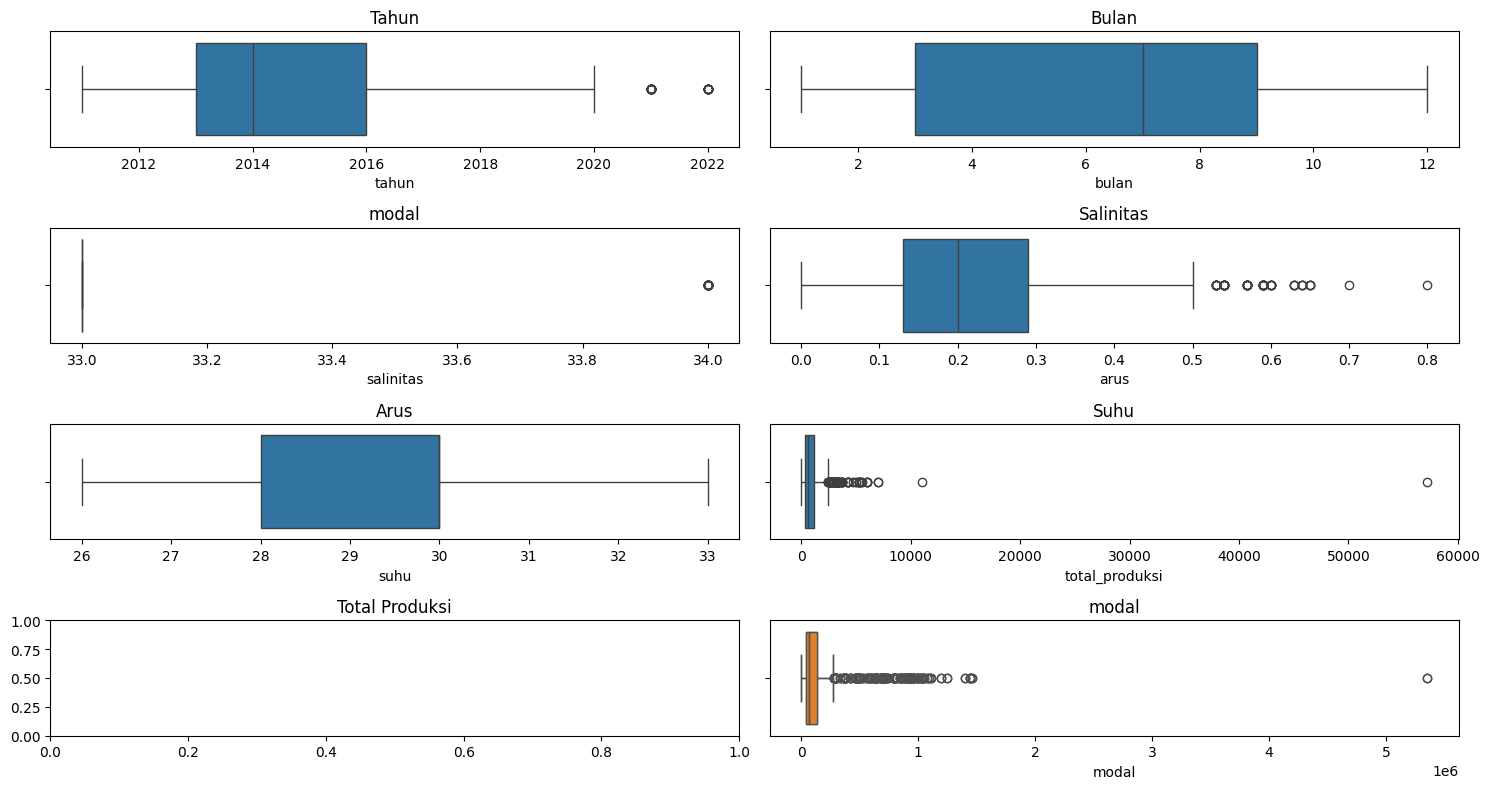

In [10]:
# Membuat plot dengan m baris, n kolom, dan p penempatan kanan (2) dan kiri (1)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 8), gridspec_kw={'width_ratios': [1, 1]})

sns.boxplot(x=df.tahun, ax=axes[0, 0])
axes[0, 0].set_title('Tahun')

sns.boxplot(x=df.bulan, ax=axes[0, 1])
axes[0, 1].set_title('Bulan')

sns.boxplot(x=df.modal, ax=axes[3, 1])
axes[1, 0].set_title('modal')

sns.boxplot(x=df.salinitas, ax=axes[1, 0])
axes[1, 1].set_title('Salinitas')

sns.boxplot(x=df.arus, ax=axes[1, 1])
axes[2, 0].set_title('Arus')

sns.boxplot(x=df.suhu, ax=axes[2, 0])
axes[2, 1].set_title('Suhu')

# Plot keenam
sns.boxplot(x=df.total_produksi, ax=axes[2, 1])
axes[3, 0].set_title('Total Produksi')

sns.boxplot(x=df.modal, ax=axes[3, 1])
axes[3, 1].set_title('modal')

plt.tight_layout()
plt.show()


In [11]:
def remove_outliers(df, columns):
    df2 = df.copy()
    for column in columns:
        Q1 = df2[column].quantile(0.25)
        Q3 = df2[column].quantile(0.75)
        IQR = Q3 - Q1

        # Filter data tanpa outlier
        df2 = df2[(df2[column] >= Q1 - 1.5 * IQR) & (df2[column] <= Q3 + 1.5 * IQR)]

    return df2

# List kolom yang ingin dihapus outlier-nya
kolom = ['tahun', 'bulan', 'salinitas', 'tanggal', 'arus', 'suhu', 'total_produksi', 'modal']

# Hapus outlier dari DataFrame
df2 = remove_outliers(df, kolom)

# Cetak DataFrame tanpa outlier
print(df2)

     tahun  bulan  tanggal      arus  salinitas  suhu   modal  total_produksi
0     2011      8       10  0.229444         33    30  182520            1950
1     2011      8       11  0.229444         33    29   89107             952
2     2011      8       14  0.229444         33    30  145735            1557
3     2011      8       14  0.229444         33    30  114660            1225
5     2011      8       17  0.229444         33    30  109980            1175
..     ...    ...      ...       ...        ...   ...     ...             ...
651   2020      3       11  0.070000         33    29   78062             278
655   2020      7        7  0.150000         33    28  193747             723
656   2020      7       14  0.150000         33    29   24991              89
657   2020      7       16  0.150000         33    29  155844             555
660   2020      7       24  0.150000         33    30  109729             422

[503 rows x 8 columns]


In [12]:
#melihat data yang kosong akibat penghapusan outlier
df2.isnull().any()

tahun             False
bulan             False
tanggal           False
arus              False
salinitas         False
suhu              False
modal             False
total_produksi    False
dtype: bool

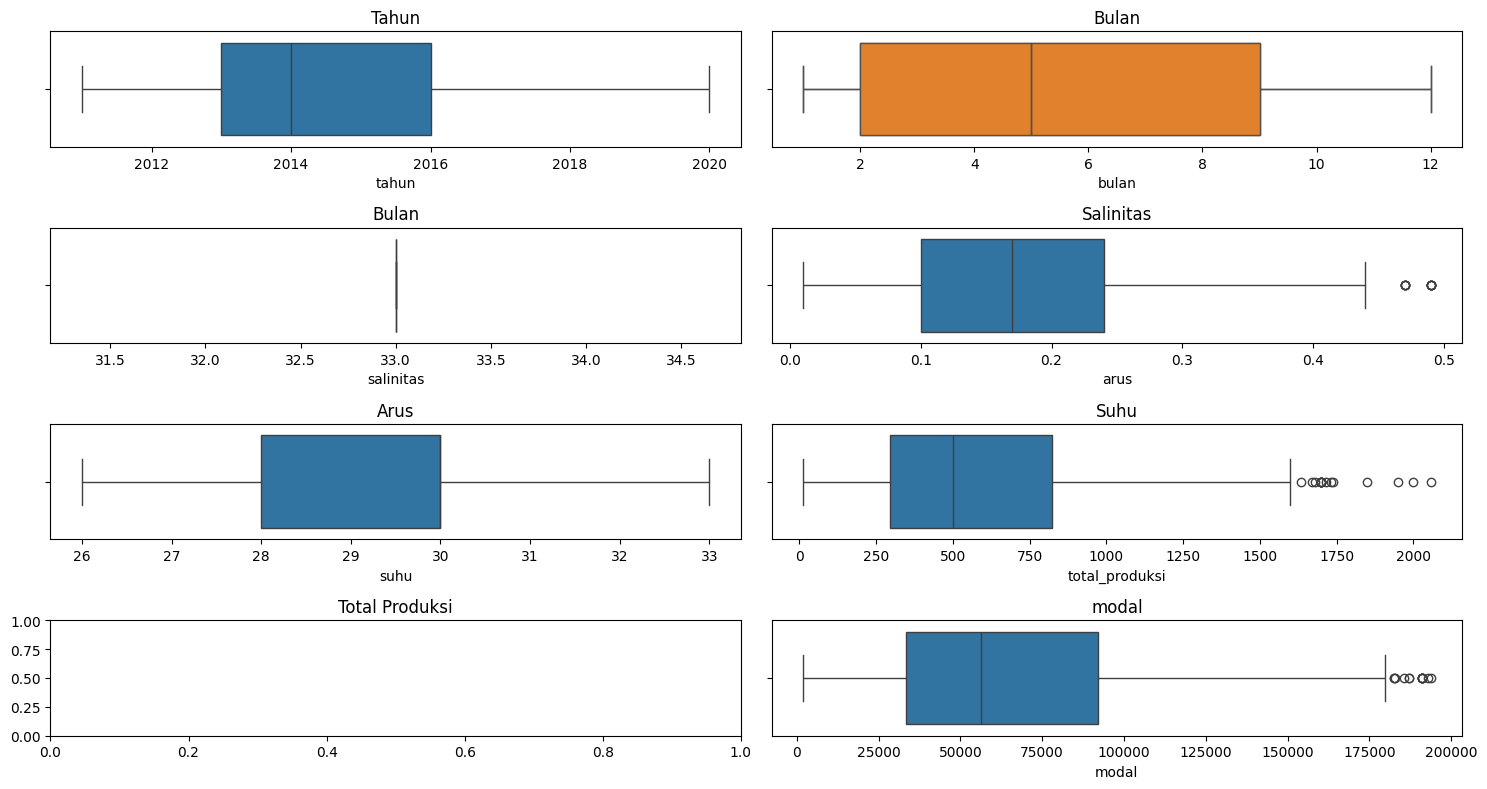

In [13]:
#sudah dihapus outlier
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 8), gridspec_kw={'width_ratios': [1, 1]})

sns.boxplot(x=df2.tahun, ax=axes[0, 0])
axes[0, 0].set_title('Tahun')

sns.boxplot(x=df2.bulan, ax=axes[0, 1])
axes[0, 1].set_title('Bulan')

sns.boxplot(x=df2.bulan, ax=axes[0, 1])
axes[1, 0].set_title('Bulan')

sns.boxplot(x=df2.salinitas, ax=axes[1, 0])
axes[1, 1].set_title('Salinitas')

sns.boxplot(x=df2.arus, ax=axes[1, 1])
axes[2, 0].set_title('Arus')

sns.boxplot(x=df2.suhu, ax=axes[2, 0])
axes[2, 1].set_title('Suhu')

sns.boxplot(x=df2.total_produksi, ax=axes[2, 1])
axes[3, 0].set_title('Total Produksi')

sns.boxplot(x=df2.modal, ax=axes[3, 1])
axes[3, 1].set_title('modal')

plt.tight_layout()
plt.show()


In [14]:
print ('before removing outliers :', len(df))
print ('after removing outliers :', len(df2))
print ('outliers :',len(df)-len(df2))

before removing outliers : 702
after removing outliers : 503
outliers : 199


In [15]:
#melihat skewness dan kurtosis
df2.skew()

tahun             0.276719
bulan             0.103672
tanggal           0.307292
arus              0.538242
salinitas         0.000000
suhu              0.002952
modal             0.844279
total_produksi    0.944855
dtype: float64

In [16]:
df2.kurtosis()

tahun            -0.492667
bulan            -1.399227
tanggal          -1.008102
arus              0.071464
salinitas         0.000000
suhu             -0.469389
modal             0.167560
total_produksi    0.615144
dtype: float64

C:\Users\Nabila Tufailah\AppData\Local\Temp\ipykernel_16696\1364724297.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normal_rets, ax=axes[0, 0])
C:\Users\Nabila Tufailah\AppData\Local\Temp\ipykernel_16696\1364724297.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.tahun, ax=axes[0, 

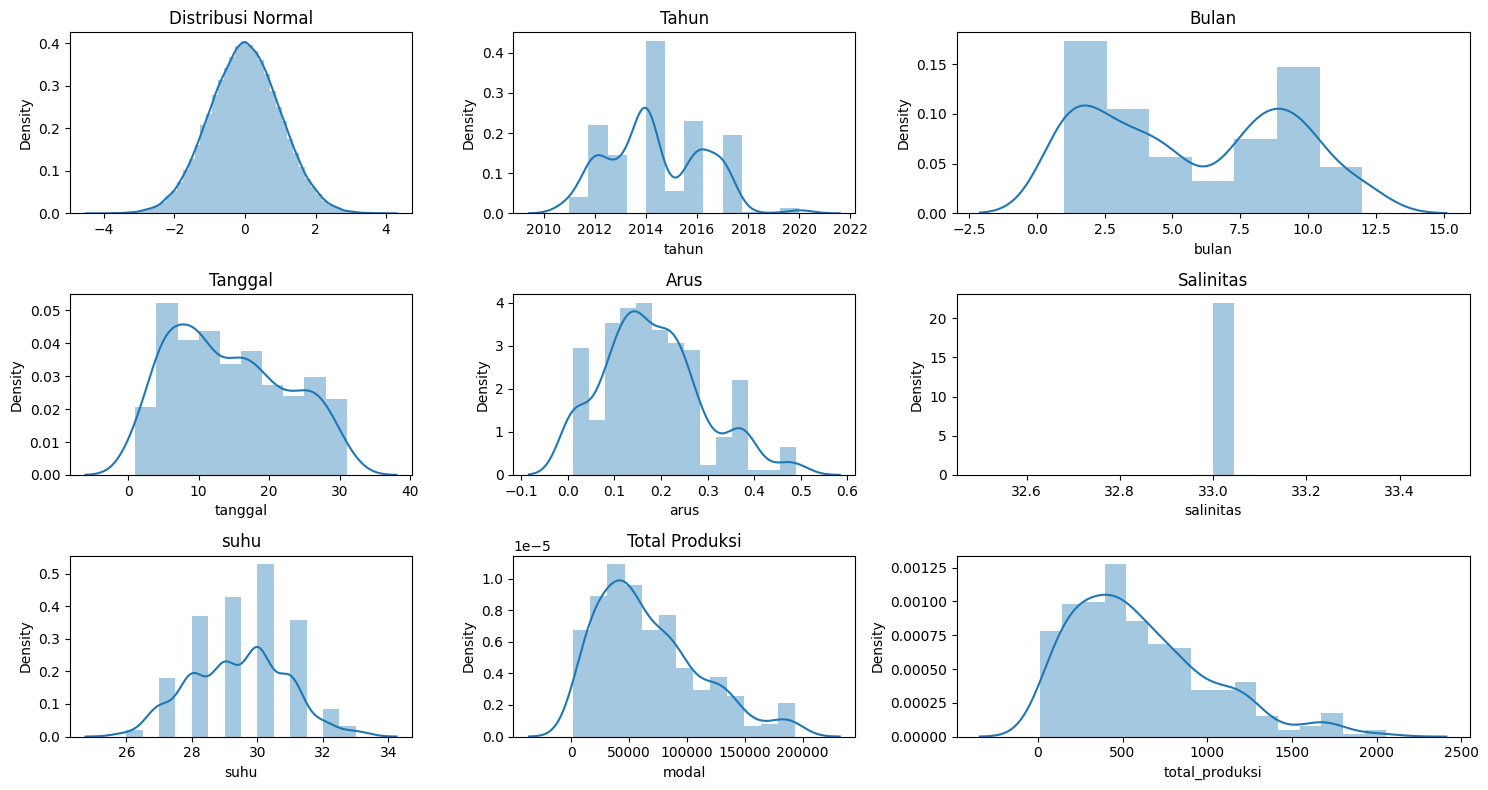

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8), gridspec_kw={'width_ratios': [1, 1, 1.5]})

normal_rets = np.random.normal(0,1,(100000,1))
sns.distplot(normal_rets, ax=axes[0, 0])
axes[0, 0].set_title('Distribusi Normal')

sns.distplot(df2.tahun, ax=axes[0, 1])
axes[0, 1].set_title('Tahun')

sns.distplot(df2.bulan, ax=axes[0, 2])
axes[0, 2].set_title('Bulan')

sns.distplot(df2.tanggal, ax=axes[1, 0])
axes[1, 0].set_title('Tanggal')

sns.distplot(df2.arus, ax=axes[1, 1])
axes[1, 1].set_title('Arus')

sns.distplot(df2.salinitas, ax=axes[1, 2])
axes[1, 2].set_title('Salinitas')

sns.distplot(df2.suhu, ax=axes[2, 0])
axes[2, 0].set_title('suhu')

sns.distplot(df2.modal, ax=axes[2, 1])
axes[2, 1].set_title('Modal')

sns.distplot(df2.total_produksi, ax=axes[2,2])
axes[2, 1].set_title('Total Produksi')

plt.tight_layout()
plt.show()

In [19]:
# Mengaplikasikan cuberoot root transformation pada kolom tertentu : indikasi right skeness
columns_to_transform = ['bulan','suhu','tanggal','tahun','arus', 'modal','total_produksi']
df2[columns_to_transform]= np.cbrt(df2[columns_to_transform])


C:\Users\Nabila Tufailah\AppData\Local\Temp\ipykernel_16696\3170929540.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normal_rets, ax=axes[0, 0])
C:\Users\Nabila Tufailah\AppData\Local\Temp\ipykernel_16696\3170929540.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.tahun, ax=axes[0, 

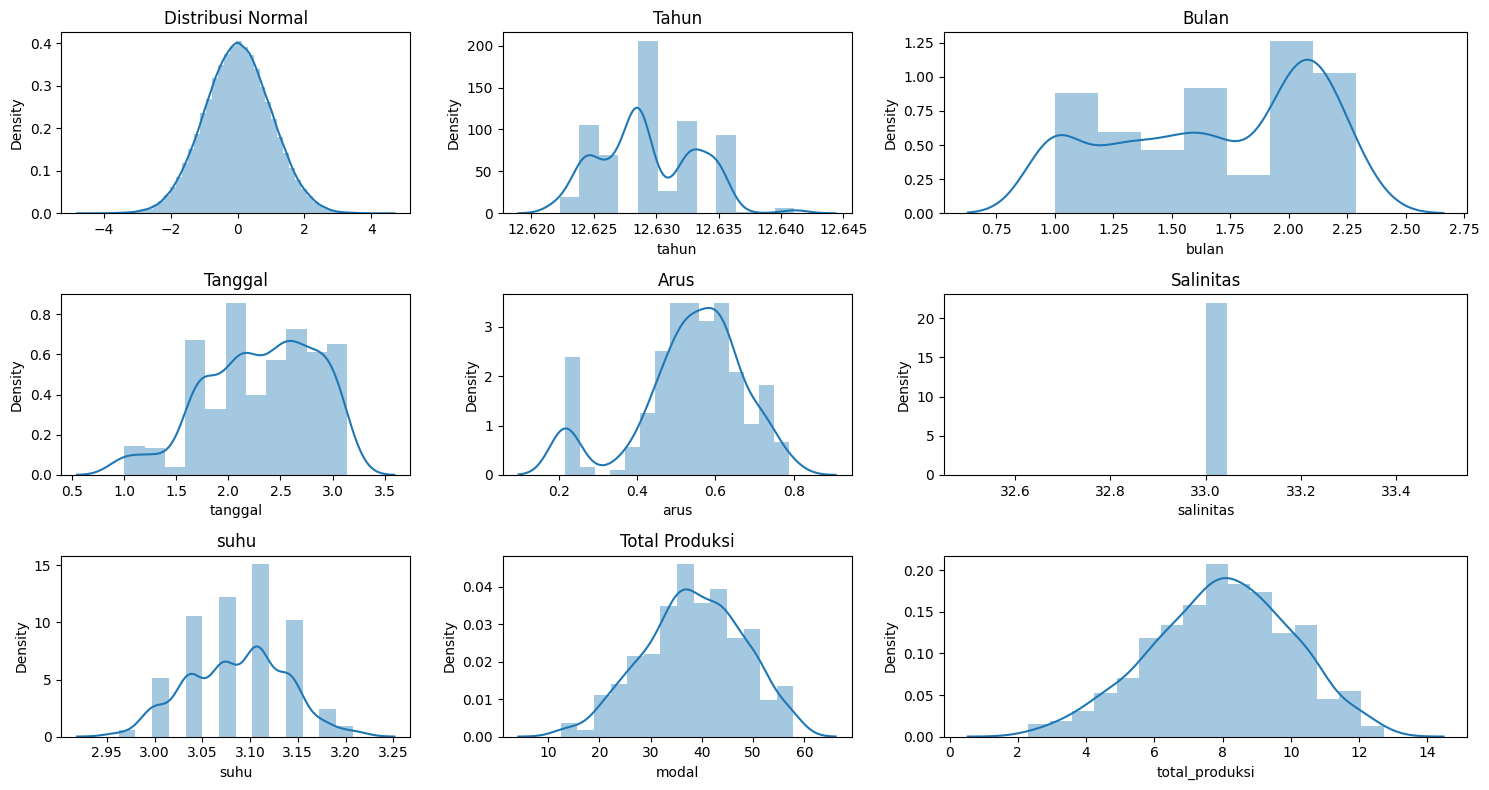

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8), gridspec_kw={'width_ratios': [1, 1, 1.5]})

normal_rets = np.random.normal(0,1,(100000,1))
sns.distplot(normal_rets, ax=axes[0, 0])
axes[0, 0].set_title('Distribusi Normal')

sns.distplot(df2.tahun, ax=axes[0, 1])
axes[0, 1].set_title('Tahun')

sns.distplot(df2.bulan, ax=axes[0, 2])
axes[0, 2].set_title('Bulan')

sns.distplot(df2.tanggal, ax=axes[1, 0])
axes[1, 0].set_title('Tanggal')

sns.distplot(df2.arus, ax=axes[1, 1])
axes[1, 1].set_title('Arus')

sns.distplot(df2.salinitas, ax=axes[1, 2])
axes[1, 2].set_title('Salinitas')

sns.distplot(df2.suhu, ax=axes[2, 0])
axes[2, 0].set_title('suhu')

sns.distplot(df2.modal, ax=axes[2, 1])
axes[2, 1].set_title('Modal')

sns.distplot(df2.total_produksi, ax=axes[2, 2])
axes[2, 1].set_title('Total Produksi')

plt.tight_layout()
plt.show()

<Axes: >

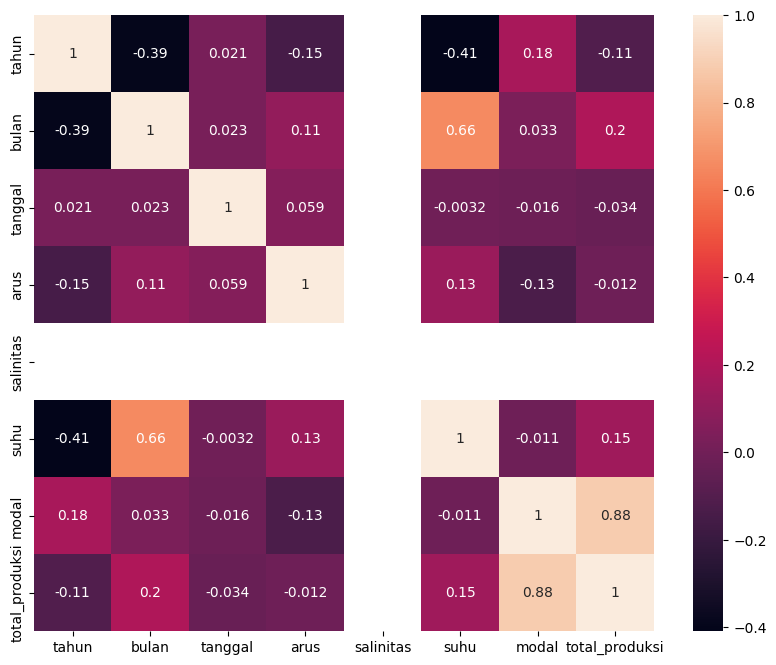

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(), annot=True)

In [22]:
#pembagian data
X = df2.iloc[:,0:-1].values
y = df2.iloc[:,7].values

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.3,random_state=42)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1,1)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(352, 7) (352, 1)
(151, 7) (151, 1)


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [77]:
from sklearn.decomposition import PCA
pca = PCA(7)

In [78]:
pca.fit(X_train_scaled)

PCA(n_components=7)

In [79]:
X_train_scaled = pca.transform(X_train_scaled)
X_test_scaled = pca.transform(X_test_scaled)

In [80]:
#algoritma gridsearch
import pickle
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
models = {}

for kernel in kernels:
    svr_model = SVR(kernel=kernel)

    param_grid = {}
    if kernel == 'linear':
        param_grid = {"C": [0.1, 1, 10]}
    elif kernel == 'poly':
        param_grid = {"C": [0.1, 1, 10], "degree": [2, 3, 4], "coef0": [0.0, 0.1, 0.5], "gamma": [0.01, 0.1, 1]}
    elif kernel == 'rbf':
        param_grid = {"C": [0.1, 1, 10], "gamma": [0.01, 0.1]}
    elif kernel == 'sigmoid':
        param_grid = {"C": [0.1, 1, 10], "coef0": [0.0, 0.1, 0.5], "gamma": [0.01, 0.1, 1]}

    grid_search = GridSearchCV(svr_model, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train.ravel())

    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test_scaled)

    mse = mean_squared_error(y_test.ravel(), y_pred.ravel())
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test.ravel() - y_pred) / y_test.ravel())) * 100

    models[kernel] = best_model

    print(f"Kernel: {kernel}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"RMSE: {rmse}")
    print(f'MAPE: {mape:.2f}%')
    print("-------------")


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Kernel: linear
Best Parameters: {'C': 0.1}
RMSE: 0.8346099610656142
MAPE: 7.52%
-------------
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Kernel: poly
Best Parameters: {'C': 1, 'coef0': 0.5, 'degree': 3, 'gamma': 0.1}
RMSE: 0.7169910640676691
MAPE: 5.66%
-------------
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Kernel: rbf
Best Parameters: {'C': 10, 'gamma': 0.1}
RMSE: 0.6720687442223267
MAPE: 4.95%
-------------
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Kernel: sigmoid
Best Parameters: {'C': 10, 'coef0': 0.0, 'gamma': 0.01}
RMSE: 0.8363268899987671
MAPE: 7.55%
-------------


In [102]:
C = loaded_model.C
gamma = loaded_model.gamma
epsilon = loaded_model.epsilon

print ("C:", C)
print ("gamma:", gamma)

formula = print (f"f(x) = Σ (alpha_i * exp (-{gamma} * ||x-x_i ||^2)) + b ")

C: 1
gamma: 0.1
f(x) = Σ (alpha_i * exp (-0.1 * ||x-x_i ||^2)) + b 


In [135]:
# Memilih kernel terbaik
selected_kernel = 'rbf'
best_model_file = f"kernel_{selected_kernel}.sav"

In [136]:
# Membuka model terbaik dari file menggunakan pickle
with open(best_model_file, 'wb') as f:
    pickle.dump(models[selected_kernel], f)

In [137]:
# Membuka kembali model terbaik dari file pickle
with open(best_model_file, 'rb') as f:
    loaded_model = pickle.load(f)

In [138]:
# Cek apakah model telah dimuat dengan benar
print("Model yang dimuat:", loaded_model)

Model yang dimuat: SVR(C=1, coef0=0.5, gamma=0.1, kernel='poly')


In [139]:
# Melakukan prediksi dengan data uji menggunakan model dari pickle
y_pred_test_pickle = loaded_model.predict(X_test_scaled)

In [140]:
# Melakukan prediksi baru menggunakan model dari pickle
prediksi = loaded_model.predict([[2022,12,18,0.80,33,30,786240]]).reshape(1,-1)
print("Prediksi Baru:", prediksi)

Prediksi Baru: [[1.03039828e+08]]


In [141]:
# Melakukan prediksi baru menggunakan model dari pickle
prediksi = loaded_model.predict([[2030,9,1,1,35,33,0]]).reshape(1,-1)
print("Prediksi Baru:", prediksi)

Prediksi Baru: [[1.05436435e+08]]


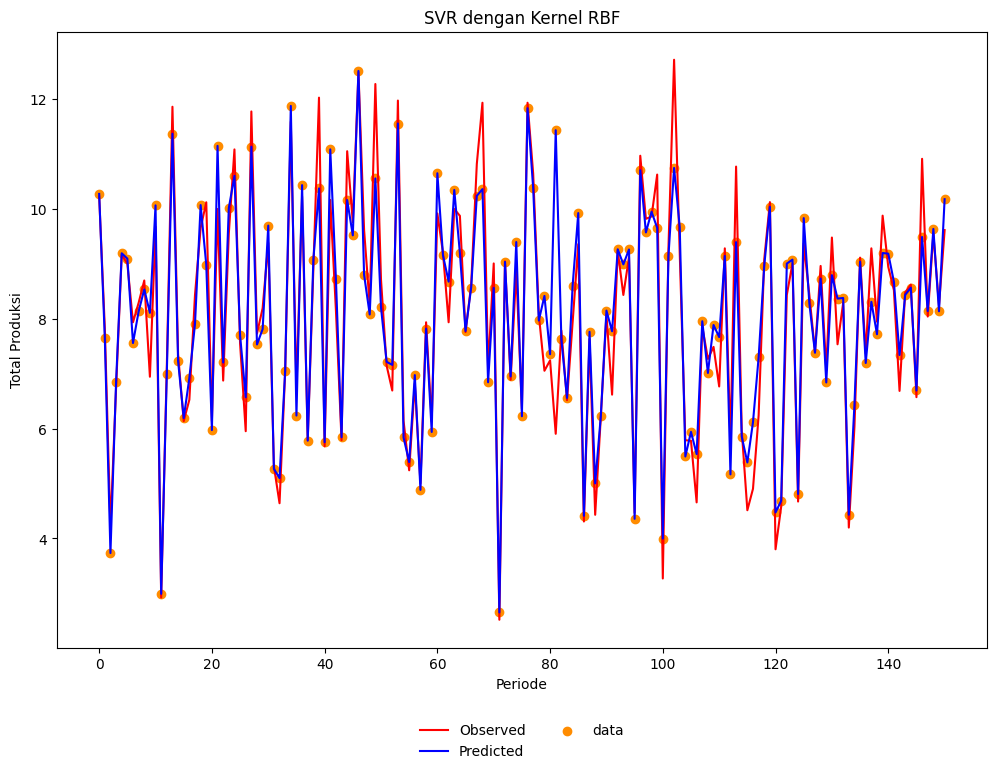

In [142]:
plt.rcParams['figure.figsize'] = (12,8)
x_ax = range(len(X_test_scaled))
plt.plot(x_ax, y_test, label = 'Observed', color = 'r', linestyle = '-')
plt.plot(x_ax, y_pred_test_pickle, label = 'Predicted', color = 'b', linestyle = '-')
plt.scatter(x_ax, y_pred_test_pickle, color='darkorange', label='data')
plt.ylabel('Total Produksi')
plt.xlabel('Periode')
plt.title('SVR dengan Kernel RBF')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)
plt.show()

In [182]:
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'matplotlib version: {plt.matplotlib.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'Scikit-learn version: {sklearn.__version__}')

pandas version: 2.1.2
numpy version: 1.26.1
matplotlib version: 3.8.0
seaborn version: 0.13.0
Scikit-learn version: 1.3.2
